<a href="https://colab.research.google.com/github/maruvadaItis/Movie-Recommender-System/blob/master/image_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 15kB/s 
     |████████████████████████████████| 4.3MB 47.3MB/s 
     |████████████████████████████████| 501kB 47.1MB/s 


In [0]:

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
print(tf.__version__)

2.0.0-rc0


In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [0]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Counting objects: 100% (7873/7873), done.
remote: Compressing objects: 100% (7873/7873), done.
remote: Total 7873 (delta 1), reused 7872 (delta 0), pack-reused 0
Receiving objects: 100% (7873/7873), 246.59 MiB | 51.93 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [0]:

data = pd.read_csv('/content/Movies-Poster_Dataset/train.csv')
data.shape

(7254, 27)

In [0]:

data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:

img_width = 350
img_height = 350

X = []

for i in tqdm(range(data.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 7254/7254 [00:37<00:00, 194.90it/s]


In [0]:
X.shape

(7254, 350, 350, 3)

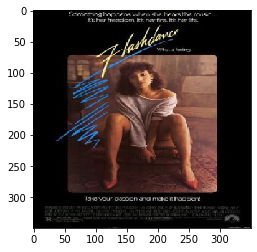

In [0]:

plt.imshow(X[1])

In [0]:

data['Genre'][1]

"['Drama', 'Romance', 'Music']"

In [0]:

y = data.drop(['Id', 'Genre'], axis = 1)
y = y.to_numpy()
y.shape

(7254, 25)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)
X_train[0].shape

(350, 350, 3)

In [0]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(25, activation='sigmoid'))

In [0]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

In [0]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=8, validation_data=(X_test, y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/8
6165/6165 [==============================] - 789s 128ms/sample - loss: 0.2451 - accuracy: 0.9112 - val_loss: 0.3167 - val_accuracy: 0.9022
Epoch 2/8
6165/6165 [==============================] - 793s 129ms/sample - loss: 0.2384 - accuracy: 0.9133 - val_loss: 0.2749 - val_accuracy: 0.9078
Epoch 3/8
6165/6165 [==============================] - 782s 127ms/sample - loss: 0.2358 - accuracy: 0.9138 - val_loss: 0.2811 - val_accuracy: 0.9072
Epoch 4/8
6165/6165 [==============================] - 789s 128ms/sample - loss: 0.2339 - accuracy: 0.9152 - val_loss: 0.2404 - val_accuracy: 0.9087
Epoch 5/8
6165/6165 [==============================] - 787s 128ms/sample - loss: 0.2306 - accuracy: 0.9162 - val_loss: 0.2321 - val_accuracy: 0.9133
Epoch 6/8
6165/6165 [==============================] - 791s 128ms/sample - loss: 0.2284 - accuracy: 0.9162 - val_loss: 0.2345 - val_accuracy: 0.9113
Epoch 7/8
6165/6165 [==============================] - 792

In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

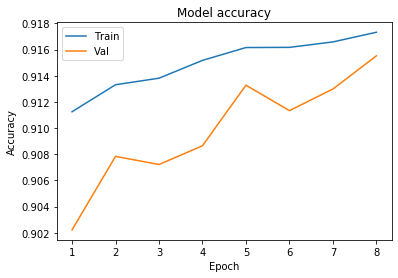

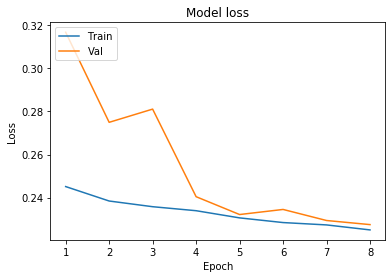

In [0]:
plot_learningCurve(history, 8)

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Comedy
Action
Romance


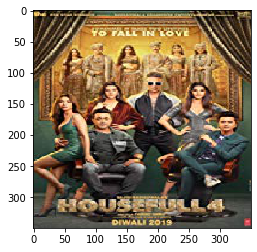

In [0]:
img = image.load_img('/content/housefull4.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]
print(classes)
y_prob = model.predict(img)
top4 = np.argsort(y_prob[0])[:-5:-1]

for i in range(4):
  print(classes[top4[i]])

In [0]:
y_prob[0]

array([9.4549716e-02, 8.2208765e-01, 7.3611736e-05, 9.4433248e-01,
       4.3147802e-03, 5.1223701e-01, 9.9918079e-01, 4.4256151e-03,
       7.4672729e-02, 3.5644382e-02, 1.3709068e-06, 7.7682734e-01,
       1.6939640e-04, 3.0376285e-02, 7.9937983e-01, 5.5330682e-01,
       1.9876420e-02, 2.5668800e-02, 7.7280283e-02, 2.8471851e-01,
       9.9957323e-01, 2.0793676e-03, 4.8695296e-02, 1.3543963e-03,
       1.9229474e-02], dtype=float32)